In [1]:
import simulation
import pynbody
import matplotlib.pylab as plt
import numpy as np
# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

In [2]:
sim = simulation.MoriaSim('69002_p200.0_a600.0_r600.0_c8.15_z0', kicked=True)

loading simulation: 69002_p200.0_a600.0_r600.0_c8.15_z0
No sumfile found


In [3]:
sim.compute_cog()

Loading precomputed center of gravity for all the snapshots (.cog/69002_p200.0_a600.0_r600.0_c8.15_z0.cog.npz)


In [4]:
sim_no_kick = simulation.MoriaSim('69002', kicked=False)
# sim_no_kick._center_all()

loading simulation: 69002
Getting sumfile: /home/michele/sim/MoRIA/results/sumfiles/69002.dat


In [22]:
(_,t_m), (_, vcm_m) = np.load("69002.v_circ.g.npz").items()
(_,t_s), (_, vcm_s)= np.load('69002_p200.0_a600.0_r600.0_c8.15_z0.v_circ.g.npz').items()

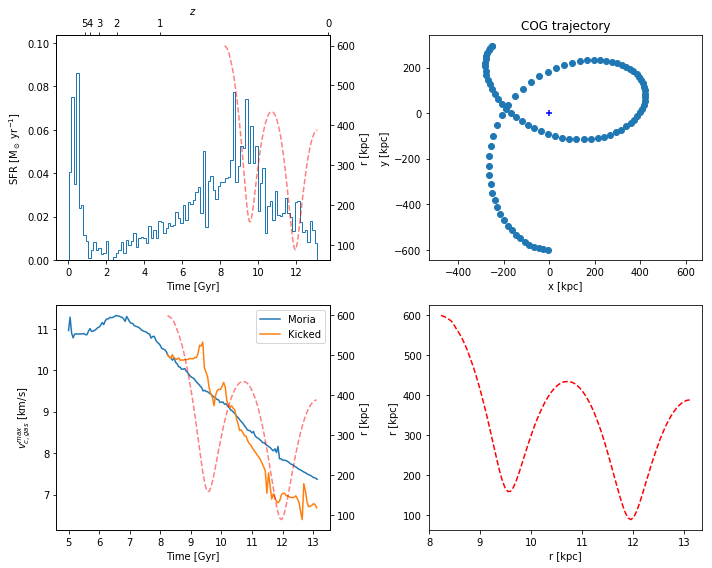

In [6]:
fig, ((ax_sfh, ax_cog), (ax_v_circ,ax_r)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
sim.plot_sfh(ax_sfh)
ax_r1 = ax_sfh.twinx()
ax_r1.plot(sim.times, np.linalg.norm(sim.cog, axis=0), 'r--', alpha=0.5)
ax_r1.set_ylabel("r [kpc]")
sim.plot_cog(ax_cog)
# p = profile()

ax_v_circ.plot(t_m, vcm_m, label="Moria")
ax_v_circ.plot(t_s, vcm_s, label="Kicked")
ax_v_circ.set_xlabel("Time [Gyr]")
ax_v_circ.set_ylabel("$v_{c, gas}^{max}$ [km/s]")
ax_r2 = ax_v_circ.twinx()
ax_r2.plot(sim.times, np.linalg.norm(sim.cog, axis=0), 'r--', alpha=0.5)
ax_r2.set_ylabel("r [kpc]")
ax_v_circ.legend()

ax_r.plot(sim.times, np.linalg.norm(sim.cog, axis=0), 'r--')
ax_r.set_xlabel("r [kpc]")
ax_r.set_ylabel("r [kpc]")

fig.tight_layout()

In [10]:
sim2 = simulation.MoriaSim('69002_p400.0_a600.0_r600.0_c8.15_z0', kicked=True)
sim2.compute_cog()
fig, ax = plt.subplots(1, figsize=(4,4))
ax.plot(sim2.times, np.linalg.norm(sim2.cog, axis=0), 'r--')
ax.set_xlabel("r [kpc]")
ax.set_ylabel("r [kpc]")

loading simulation: 69002_p400.0_a600.0_r600.0_c8.15_z0
No sumfile found
Loading precomputed center of gravity for all the snapshots


FigureCanvasNbAgg()

Text(0,0.5,'r [kpc]')

In [ ]:
sim3 = simulation.MoriaSim('69002_p598.0_a600.0_r600.0_c8.15_z0', kicked=True)
sim3.compute_cog(force=True)
fig, ax = plt.subplots(1, figsize=(4,4))
ax.plot(sim3.times, np.linalg.norm(sim3.cog, axis=0), 'r--')
ax.set_xlabel("r [kpc]")
ax.set_ylabel("r [kpc]")

FigureCanvasNbAgg()

Text(0,0.5,'r [kpc]')

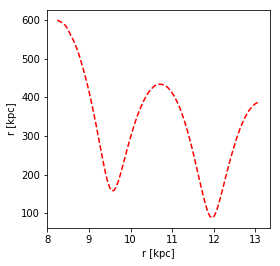

In [21]:
%matplotlib ipympl
fig, ax = plt.subplots(1, figsize=(4,4))
ax.plot(sim.times, np.linalg.norm(sim.cog, axis=0), 'r--')
ax.set_xlabel("r [kpc]")
ax.set_ylabel("r [kpc]")

In [6]:
sim = simulation.MoriaSim('69002_p200.0_a600.0_r600.0_c8.15_z0', kicked=True)
sim.compute_cog()

loading simulation: 69002_p200.0_a600.0_r600.0_c8.15_z0
No sumfile found
Loading precomputed center of gravity for all the snapshots


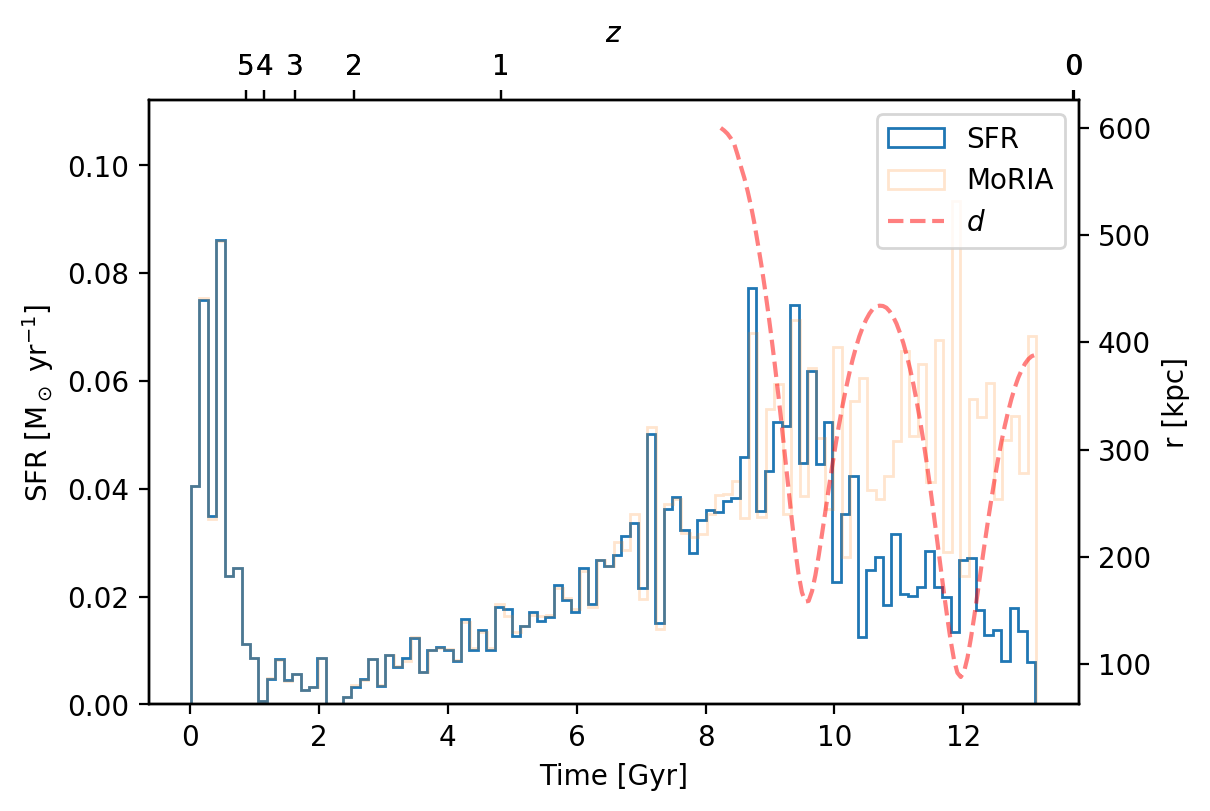

In [11]:
figsize = (6,4)
fig, ax_sfh = plt.subplots(1, figsize=figsize, dpi=200)
sim.plot_sfh(ax_sfh, label='SFR')
ax_r1 = ax_sfh.twinx()
ax_r1.plot(sim.times, np.linalg.norm(sim.cog, axis=0), 'r--', alpha=0.5, label='$d$')
ax_r1.set_ylabel("r [kpc]")
sim_no_kick.plot_sfh(ax_sfh, label="MoRIA", alpha=0.2)
lines, labels = ax_sfh.get_legend_handles_labels()
lines2, labels2 = ax_r1.get_legend_handles_labels()
ax_sfh.legend(lines + lines2, labels + labels2, loc=0)
# fig.legend(loc=7);#ax_r1.legend();

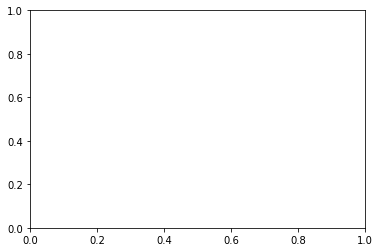

In [8]:
sim_no_kick.plot_sfh(ax_sfh, label="MoRIA")

In [9]:
def plot_cog(cog, ax_cog, cur_snap=None, **kwargs):
    if ax_cog is None:
        fig, ax_cog = plt.subplots(1, figsize=(8,8))
    ax_cog.set_xlabel("x [kpc]")
    ax_cog.set_ylabel("y [kpc]")
    ax_cog.plot(*cog[:2], **kwargs)
    # Plot current position and center
    if cur_snap is not None:
        ax_cog.scatter(*cog[:2, cur_snap], color="red")
    ax_cog.scatter(0, 0, marker='+', color="b")
    ax_cog.set_title("COG trajectory")
    ax_cog.axis('equal')
    return ax_cog

In [ ]:
cogs = {f: sim.compute_cog(family=f, force=False) for f in ['gas', 'star', 'dm']}

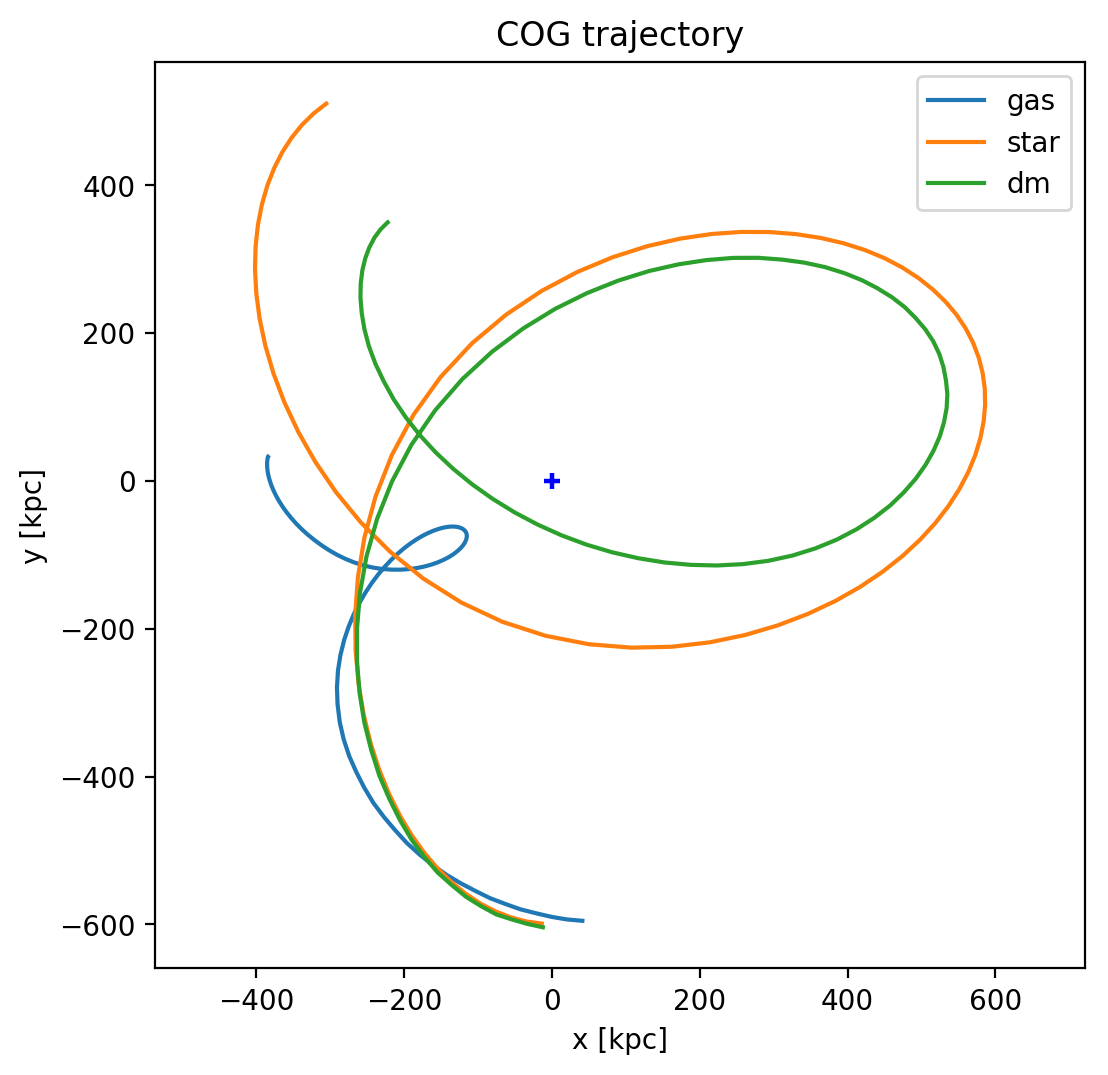

In [12]:
fig, ax_cog = plt.subplots(1, figsize=(6,6), dpi=200)
for kind, cog in cogs.items():
    plot_cog(cog, ax_cog, label=kind)

ax_cog.legend()

Center of gravity already computed


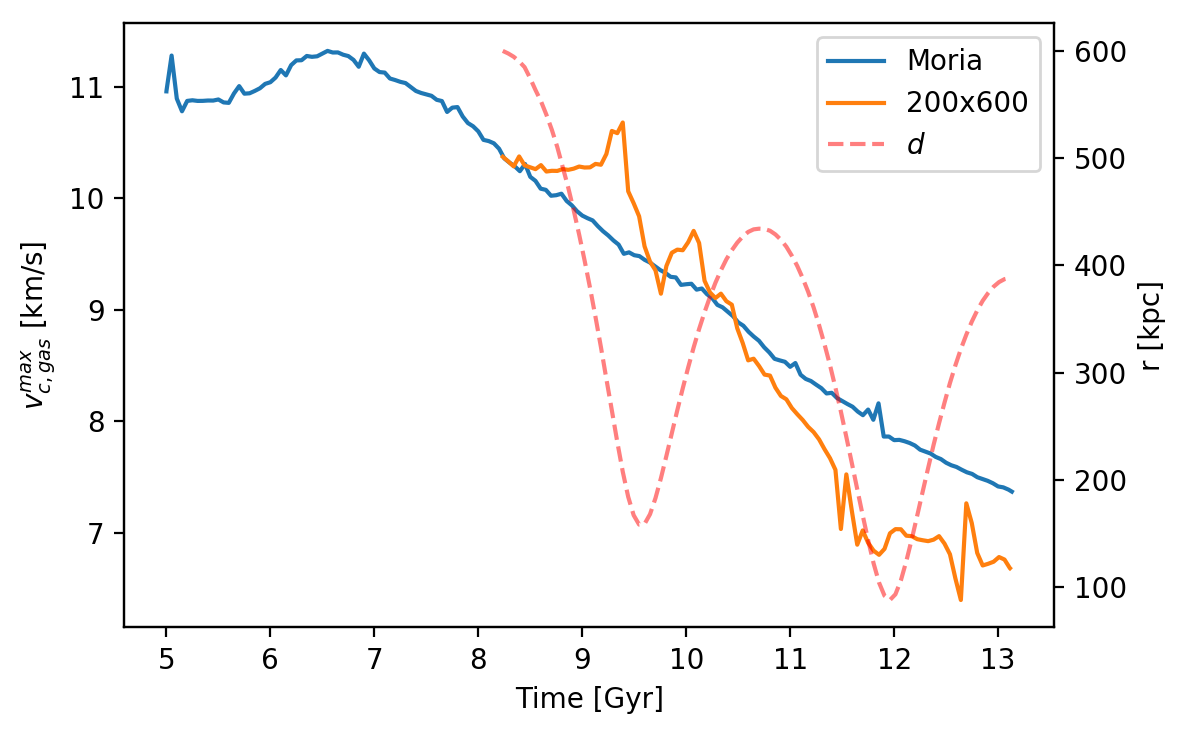

In [29]:
%matplotlib inline
fig, ax_v_circ = plt.subplots(1, figsize=figsize, dpi=200)
sim.compute_cog()
ax_v_circ.plot(t_m, vcm_m, label="Moria")
ax_v_circ.plot(t_s, vcm_s, label="200x600")
ax_v_circ.set_xlabel("Time [Gyr]")
ax_v_circ.set_ylabel("$v_{c, gas}^{max}$ [km/s]")
ax_r2 = ax_v_circ.twinx()
ax_r2.plot(sim.times, np.linalg.norm(sim.cog, axis=0), 'r--', alpha=0.5, label='$d$')
ax_r2.set_ylabel("r [kpc]")
lines, labels = ax_v_circ.get_legend_handles_labels()
lines2, labels2 = ax_r2.get_legend_handles_labels()
ax_v_circ.legend(lines + lines2, labels + labels2, loc=0)

In [6]:
w = sim.interact_profiles(default='v_circ', nbins=100)
w

interactive(children=(IntSlider(value=0, continuous_update=False, description='Snap:', max=94), ToggleButtons(description='family', options=('g', 's'), value='g'), ToggleButtons(description='y', index=31, options=('E_circ', 'acce_norm', 'vel_norm', 'Q', 'X', 'beta', 'density', 'density_enc', 'dyntime', 'fesp', 'fourier', 'g_spherical', 'j_circ', 'j_phi', 'j_theta', 'jtot', 'kappa', 'magnitudes', 'mass', 'mass_enc', 'mgsp', 'omega', 'pattern_frequency', 'pot', 'p', 'rho', 'rotation_curve_spherical', 'sb', 'smooth', 'temp', 'u', 'v_circ', 'vel', 'zsph', 'vr', 'vr_disp'), value='v_circ'), FloatRangeSlider(value=(0.0, 1000.0), continuous_update=False, description='radius:', max=1000.0, readout_format='.0f', step=10.0), Output()), _dom_classes=('widget-interact',))

In [7]:
# sim_no_kick._center_all()
sim_no_kick.interact_profiles(_snap_slider=w.children[0], offset=66)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Snap:', max=94), ToggleButtons(description='family', options=('g', 's'), value='g'), ToggleButtons(description='y', index=30, options=('E_circ', 'acce_norm', 'vel_norm', 'Q', 'X', 'beta', 'density', 'density_enc', 'dyntime', 'fesp', 'fourier', 'g_spherical', 'j_circ', 'j_phi', 'j_theta', 'jtot', 'kappa', 'magnitudes', 'mass', 'mass_enc', 'mgsp', 'omega', 'pattern_frequency', 'pot', 'p', 'rho', 'rotation_curve_spherical', 'sb', 'smooth', 'temp', 'u', 'v_circ', 'vel', 'zsph', 'vr', 'vr_disp'), value='u'), FloatRangeSlider(value=(0.0, 1000.0), continuous_update=False, description='radius:', max=1000.0, readout_format='.0f', step=10.0), Output()), _dom_classes=('widget-interact',))